# Logistic Regression
You should build a machine learning pipeline using a logistic regression model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Train and test a logistic regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [1]:
# importing important libraries
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\Blaq_Jesus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the dataset

In [2]:
# reading the csv file
df = pd.read_csv('mnist.csv')

# dropping the id column since it is of no use
df.drop('id', axis = 1, inplace = True)

# printing the first 5 rows of the data
df.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Inspection

In [3]:
# printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 24.0 MB


In [4]:
# printing the decription of all the columns in the dataset
df.describe(include = 'all')

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
mean,4.439500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076750,0.015250,0.013000,0.001500,0.0,0.0,0.0,0.0,0.0,0.0
std,2.879655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.616022,0.964495,0.822192,0.094868,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.000000,61.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the dataset into train and test set

In [5]:
# assigning the target and predictor variables
X = df.drop('class', axis = 1)/255.0
y = df['class']

In [6]:
# splitting the data into train and test data with 70% of the data as the train data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2800, 784)
(2800,)
(1200, 784)
(1200,)


### Visualizing the data points

In [7]:
# converting the data points into picture format
X = X.values.reshape(-1, 28, 28)

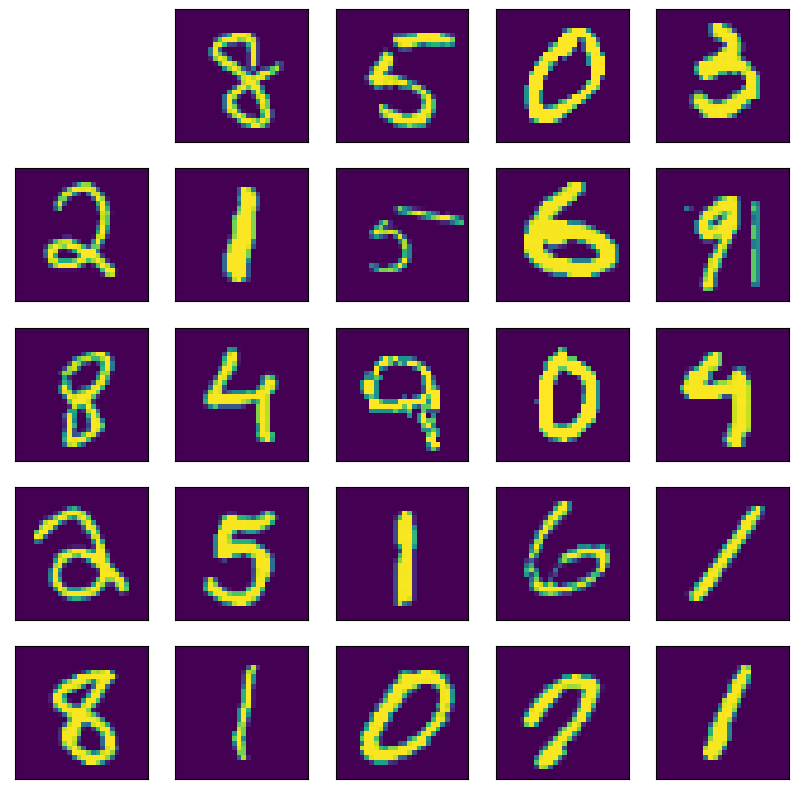

In [8]:
# plotting 25 elements in the data
plt.figure(figsize=(10,10))
for i in range(1, 25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
#     plt.xlabel(dict_key[y[i]],)
plt.show()

## Model training

In [9]:
# creating a logistic model object
lgr = LogisticRegression()

In [10]:
# traing the logistic model using the fit function
lgr.fit(x_train, y_train)

C:\Users\Blaq_Jesus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Test the model

In [11]:
# making prediction on the test set using the trained logistic regression model
y_pred = lgr.predict(x_test)

In [12]:
# pringing the predictions
y_pred

array([5, 5, 4, ..., 8, 7, 7], dtype=int64)

### Evaluate the model

In [13]:
# printing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8966666666666666

### Visualizing the Predictions

In [14]:
# converting the data points into picture format
X = x_test.values.reshape(-1, 28, 28)

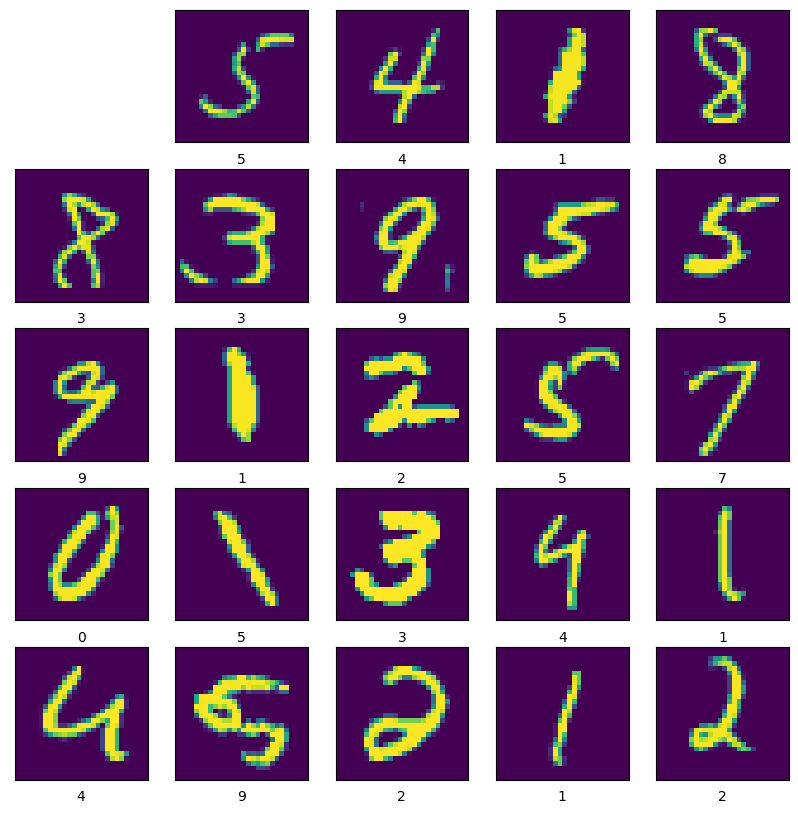

In [15]:
# plotting 25 elements in the data
plt.figure(figsize=(10,10))
for i in range(1, 25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(y_pred[i],)
plt.show()